In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/Kakao Talk.csv')

In [3]:
print(data.info())
#3개의 컬럼과 8153개의 행으로 구성 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 3 columns):
Date       8153 non-null object
User       8153 non-null object
Message    8153 non-null object
dtypes: object(3)
memory usage: 191.2+ KB
None


In [4]:
data.head(20)

,Date,User,Message
0,2019-01-19 21:49:12,미래투기꾼,26
1,2019-01-19 21:49:13,미래투기꾼,27
2,2019-01-19 21:49:15,미래투기꾼,28 집빈다
3,2019-01-19 21:49:24,미래투기꾼,근데 27일 일나가고
4,2019-01-19 21:49:30,미래투기꾼,28일 스케줄 모른다
5,2019-01-19 21:49:42,미래투기꾼,27일 일빼볼테니까
6,2019-01-19 21:49:48,미래투기꾼,올 수있는분?
7,2019-01-19 21:49:54,미래투기꾼,참고로 토일월임
8,2019-01-19 21:59:39,문경록,이야
9,2019-01-19 22:00:12,문경록,갈수는 있는데


In [8]:
corpus = data['Message']
#메세지만 출력 

In [9]:
corpus

0                     26
1                     27
2                 28 집빈다
3            근데 27일 일나가고
4            28일 스케줄 모른다
              ...       
8148                  사진
8149                  사진
8150          3성이 무려5개ㄷㄷ
8151    이제 아이디는 무조건 소방이네
8152          저거아이디1년전꺼임
Name: Message, Length: 8153, dtype: object

### 어떤것을 전처리해야할지는 모른다
#### 정제되지 않고 노이즈가 상당히 많은 데이터

In [10]:
#어떤것을 전처리해야할지를 모르기때문에 전체 데이터의 특징을 빈도분석으로 파악
import nltk

total_tokens = [token for mag in corpus for token in str(mag).split()]
#토큰으로 나눌려면 str로 바꿔야하고 그것을 토큰마다 자르는 거
print(len(total_tokens))

#13692개의 토큰이 존재 

13692


In [11]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
#유니크한 토큰들은 8658개 

print(text.vocab().most_common(10))
#가장 많이 사용된 토큰 10개 추출 

8658
[('근데', 91), ('아', 86), ('?', 77), ('ㅇㅇ', 75), ('이모티콘', 68), ('그럼', 67), ('존나', 60), ('오늘', 58), ('일단', 58), ('사진', 56)]


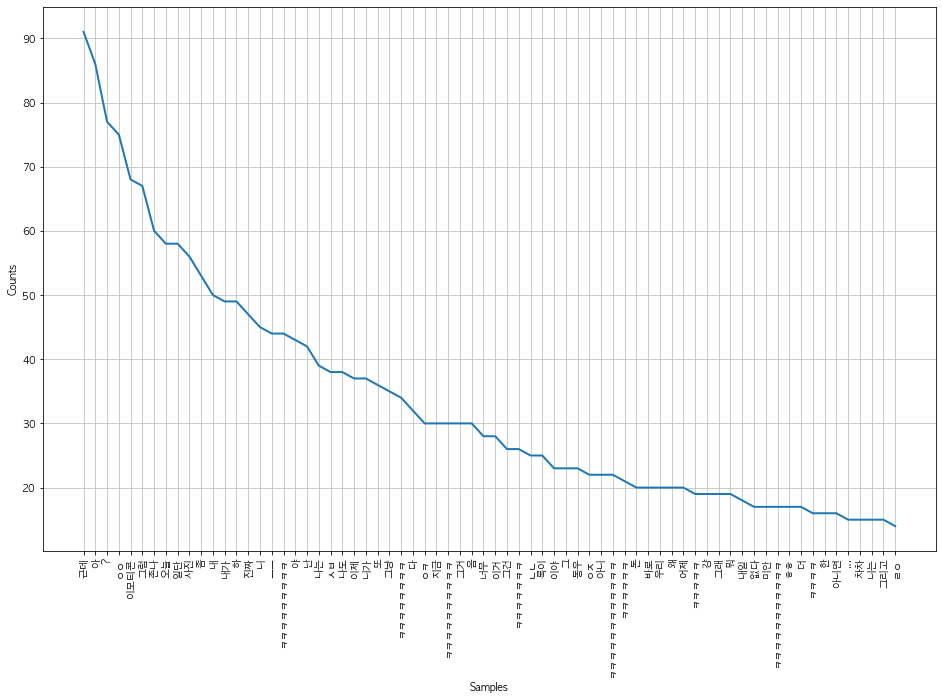

In [12]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(70)
#그다지 중요한 내용은 없어보이므로 이제부터 정제를 해야한다 

In [13]:
import re

def message_cleaning(docs):
    #리뷰만을 추출한 corpus라는 객체에서 의미없는 부분을 제거 


    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in corpus]
    
    # 1 사진이랑 이모티콘 제거 
    pattern1 = re.compile("Photo|Emoticon")
    docs = [pattern1.sub("", doc) for doc in docs]
    
    # 2 자음표현 제거 
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # 3 하이퍼링크 제거
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 4 특수문자 제거 
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def define_stopwords(path):
    
    SW = set()
    
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [14]:
SW = define_stopwords("data/stopwords-ko.txt")
# 카카오톡 텍스트를 정제합니다.
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

8153
['26', '27', '28 집빈다', '근데 27일 일나가고', '28일 스케줄 모른다', '27일 일빼볼테니까', '올 수있는분', '참고로 토일월임', '이야', '갈수는 있는데']


In [17]:
# 위의 결과를 보면 '' 빈칸이 있는데 이것들을 삭제하는 과정
# 정제되어 지워지는 텍스트를 확인하고 지워줌

cleaned_text = pd.Series(cleaned_corpus)
#시리즈를 하는 이유는 원래 있던 csv파일에 붙여주기 위해서 변환
data['Message'] = cleaned_text

cleaned_data = data[data['Message'] != ''] 
#data에서 비어있는 부분을 제외하고 인덱싱 조건

cleaned_data.info()
#8153개에서 7442개로 빈부분들이 삭제된것을 확인 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7442 entries, 0 to 8152
Data columns (total 3 columns):
Date       7442 non-null object
User       7442 non-null object
Message    7442 non-null object
dtypes: object(3)
memory usage: 232.6+ KB


In [19]:
# 정제된 데이터 저장

import pickle

with open('cleaned_data.pk' , 'wb') as f:
    pickle.dump(cleaned_data, f)